In [2]:
!pwd

/mnt/c/Users/Melih Sami Özaydın/Desktop/Yüksek Lisans/MSc_Projects/BM5113 - Bilgisayarla Görme/Referance Scripts/lecture2


/tmp/ipykernel_29226/1474318737.py:33: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
/tmp/ipykernel_29226/1474318737.py:38: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist_eq,bins = histogram(im2.flatten(),nbr_bins,normed=True)


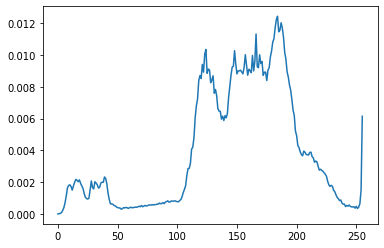

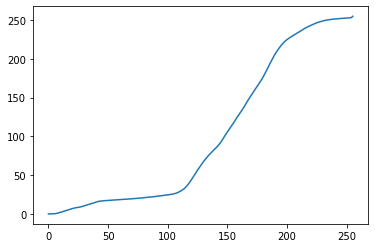

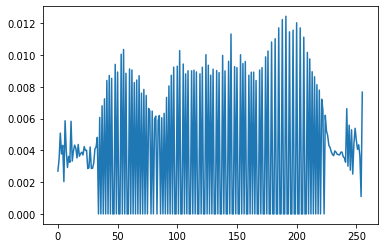

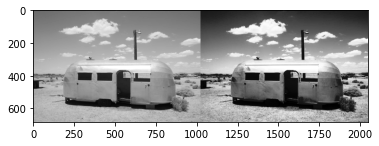

In [3]:
from PIL import Image
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import math


# # read image to array
# im = np.array(Image.open('./images/eiffel2-1.jpg').convert('L'))
# # generate a new figure
# figure()
# # don’t use colors
# gray()
# # show contours with origin upper left corner
# contour(im, origin='image')
# axis('equal')
# axis('off')

# figure()
# hist(im.flatten(),128)
# show()

## NUMPY IMHIST

def imresize(im,sz):
    """ Resize an image array using PIL. """
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    imhist_eq,bins = histogram(im2.flatten(),nbr_bins,normed=True)
    return im2.reshape(im.shape), imhist, cdf, imhist_eq

def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped') 
    averageim /= len(imlist)

    # return average as uint8
    return array(averageim, 'uint8')


# read image to array
im = np.array(Image.open('../../images/jpg/trailer.jpg').convert('L'))
im_eq, imhist, cdf, imhist_eq = histeq(im)
im_list = np.concatenate((im, im_eq), axis=1)
plt.plot(imhist)
plt.show()
plt.plot(cdf)
plt.show()
plt.plot(imhist_eq)
plt.show()
imgplot = plt.imshow(im_list, cmap='gray')  
plt.show()

(683, 1024, 3)


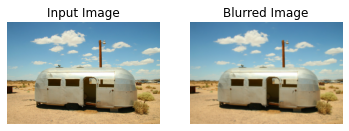

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
# With jupyter notebook uncomment below line 
# %matplotlib inline 
# This plots figures inside the notebook

def plot_cv_img(input_image, output_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   

    fig, ax = plt.subplots(nrows=1, ncols=2)

    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))          
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))          
    ax[1].set_title('Blurred Image')
    ax[1].axis('off')    
    
    # plt.savefig('../figures/xxx.png')

    plt.show()
    

def main():
    # read an image 
    img = cv2.imread('../../images/jpg/trailer.jpg')
    print(img.shape)
    img = cv2.resize(img, (1200,800))
    cv2.imwrite('../../images/jpg/trailer2.jpg', img)
    blur = cv2.blur(img,(7,7))
    edges = cv2.Canny(img,100,200)
    # Do plot
    plot_cv_img(img, blur)

if __name__ == '__main__':
    main()

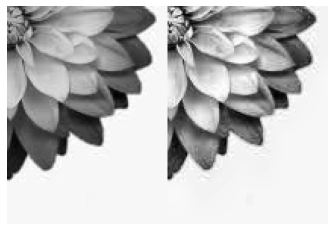

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
# With jupyter notebook uncomment below line 
# %matplotlib inline 
# This plots figures inside the notebook

def plot_gray(input_image):     
    """     
    plot grayscale image with no axis     
    """  
    # plot grayscale image with gray colormap   
    plt.imshow(input_image, cmap='gray')     
    
    # turn off axis for easier view
    plt.axis('off')
    plt.show()

def plot_hist_cdf(cdf_normalized, img):
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    

    
def main():
    # read an image 
    img = cv2.imread('../../images/jpg/flower.jpg')
    crop_gray = cv2.cvtColor(img[100:400, 100:400], cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(crop_gray)
    res = np.hstack((crop_gray,cl1))
    plot_gray(res)
    
if __name__ == '__main__':
    main()